# Stats 701-Homework8 Winter 2018
## Hsuan-Yu Yeh 
### hsuanyu@umich.edu
I discuss with Yung-Chun Lee for this homework. For problem 1, I spent 1.5 hours to finish it. For problem 2, I spent about 2 hours. For problem 3, I spent 3 hours and for problem 4, I spent 2 hours.

## Problem 1: Regular Expressions Practice
http://www.greenteapress.com/thinkpython/code/words.txt 

In [2]:
# Q1-1
from urllib.request import urlopen
from bs4 import BeautifulSoup
words = urlopen('http://www.greenteapress.com/thinkpython/code/words.txt').read()
awords = words.decode('ascii')
lwords = awords.split('\r\n')
len(lwords)


113810

##### Q1-2
The words in the list are ordered in alphabet. For example, apple is ranked before apply since e is greater than y in alphabetic list.

In [4]:
# Q1-3
import re
l1 = list()
for i in lwords:
    if len(i)==4 and re.search(r'^[^aeiouy]{4}', i):
        l1.append(i)
    elif (re.search(r'^[^aeiouy]{4}[aeiouy]+', i)):
        l1.append(i)

len(l1)
#print(l1)

60

In [48]:
# Q1-4
l2 = list()
for i in lwords:
    if (re.search(r'a.*a.*a.*a.*', i)):
        l2.append(i)
        
len(l2)
#print(l2)

50

In [43]:
# Q1-5
l3 = list()
for i in lwords:
    if (re.search(r'(^[aeiou])[^aeiouy]+[aeiou]$', i)):
        l3.append(i)

len(l3)

165

In [44]:
# Q1-6
l4 = list()
for i in lwords:
    if (len(i) == 2):
        l4.append(i)
    elif (len(i)==3 and re.search(r'(\w)\1\1', i)):
        l4.append(i)
    elif (re.search(r'(^\w{2}).*\1$', i)):
        l4.append(i)
        
len(l4)

366

## Problem 2: Exploring Internet Traffic with Regexes
http://www-personal.umich.edu/~klevin/teaching/Winter2018/STATS701/SkypeIRC.txt

In [47]:
# Q2-1
from urllib.request import urlopen
from bs4 import BeautifulSoup
words2 = urlopen('http://www-personal.umich.edu/~klevin/teaching/Winter2018/STATS701/SkypeIRC.txt').read()
awords2 = words2.decode('utf-8')
type(awords2)
lwords2 = awords2.split('\n')
len(lwords2)-1 # the last element is empty
#lwords2

' 2263 322.749776  192.168.1.2 → 212.204.214.114 TCP 66 2848 → 6667 [ACK] Seq=623 Ack=101915 Win=8011 Len=0 TSval=14538551 TSecr=2196068827'

In [12]:
# Q2-2 
l = list()
for i in lwords2:
    l.append(re.findall(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', i))
newl = [item for items in l for item in items] 
ip = list()
for i in newl:
    if i not in ip:
        ip.append(i)
len(ip)    
        

368

In [15]:
# Q2-3
lurl = list()
for i in lwords2:
    if re.search(r'\w-.*\.comcast\.net', i):
        lurl.append(re.findall(r'[\w+-]+\.\w+\.\w+\.comcast\.net', i))
new2 = [item for items in lurl for item in items] 
url = list()
for i in new2:
    if i not in url:
        url.append(i)

len(url)

25

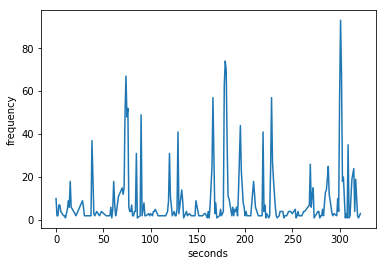

In [85]:
# Q2-4 
import matplotlib.pyplot as plt
import math
import numpy as np
ltime = list()
for i in lwords2:
    a = re.findall(r'\d+\.\d+', i)
    if a != []:
        ltime.append(math.floor(float(a[0])))

val = np.unique(ltime)
count = [ltime.count(i) for i in val]
plt.plot(val, count)
plt.xlabel('seconds')
plt.ylabel('frequency')
plt.show()

## Problem 3: Retrieving Data from the Web
https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan
https://en.wikipedia.org/wiki/Los_Angeles
https://en.wikipedia.org/wiki/Boston

In [51]:
# Q3-1 
import urllib.request
from bs4 import BeautifulSoup
aa = urllib.request.urlopen('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan')
parsed = BeautifulSoup(aa, 'html.parser')
aa = parsed.find(string=re.compile(r'Climate data for .*')).find_parents('table')[0]
aa

<table class="wikitable collapsible" style="width:90%; text-align:center; font-size:90%; line-height: 1.2em; margin:auto;">
<tr>
<th colspan="14">Climate data for Ann Arbor, Michigan (UMich, 1981–2010)</th>
</tr>
<tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)</th>
<td style="background: #FF860D; color:#000000;">72<br/>
(22)</td>
<td style="background: #FF9B37; color:#000000;">67<br/>
(19)</td>
<td style="background: #FF5600; color:#000000;">85<br/>
(29)</td>
<td style="background: #FF4800; color:#000000;">88<br/>
(31)</td>
<td style="background: #FF2C00

In [79]:
child = list(filter(lambda x: x!=None, [child.name for child in aa]))
print('There are ', len(child), 'child nodes for table.')
print('The children nodes are:', ','.join(set(child)))

There are  12 child nodes for table.
The children nodes are: tr


In [80]:
# Q3-2 
import numpy as np
def retrieve_climate_table(url):
    city = urllib.request.urlopen(url)
    if city.getcode()!=200:
        raise RuntimeError('Fail to retrieve the URL')
        
    parsed = BeautifulSoup(city, 'html.parser')
    tab = parsed.find(string = re.compile(r'Climate data for .*')).find_parents('table')
    if tab == []:
        return(None)
    else:
        index = np.asscalar(np.random.randint(low = 0, high = len(tab), size=1))
        return(tab[index])

print(retrieve_climate_table('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan'))

<table class="wikitable collapsible" style="width:90%; text-align:center; font-size:90%; line-height: 1.2em; margin:auto;">
<tr>
<th colspan="14">Climate data for Ann Arbor, Michigan (UMich, 1981–2010)</th>
</tr>
<tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)</th>
<td style="background: #FF860D; color:#000000;">72<br/>
(22)</td>
<td style="background: #FF9B37; color:#000000;">67<br/>
(19)</td>
<td style="background: #FF5600; color:#000000;">85<br/>
(29)</td>
<td style="background: #FF4800; color:#000000;">88<br/>
(31)</td>
<td style="background: #FF2C00

In [81]:
# Q3-3
def list_climate_table_row_names(url):
    tab = retrieve_climate_table(url)
    if tab == None:
        return(None)
    else:
        row = tab.find_all('th', scope='row')
        return([name.text.encode('utf-8') for name in row])
    
print(list_climate_table_row_names('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan'))
    

[b'Month', b'Record high \xc2\xb0F (\xc2\xb0C)', b'Average high \xc2\xb0F (\xc2\xb0C)', b'Daily mean \xc2\xb0F (\xc2\xb0C)', b'Average low \xc2\xb0F (\xc2\xb0C)', b'Record low \xc2\xb0F (\xc2\xb0C)', b'Average precipitation inches (mm)', b'Average snowfall inches (cm)', b'Average precipitation days (\xe2\x89\xa5 0.01 in)', b'Average snowy days (\xe2\x89\xa5 0.1 in)']


## Problem 4: Relational Database and SQL

In [77]:
# Q4-1,2
import sqlite3
import os
os.chdir('/Users/yehhsuan-yu/Umich/Stats701')
conn = sqlite3.connect('Chinook_Sqlite.sqlite')
c = conn.cursor()
name = c.execute(
    '''SELECT name FROM sqlite_master WHERE type='table' ''' 
)
count = 0
for i in name:
    count = count + 1
    print(i[0])
c.close()   
count
# There ara 11 tables in the database

Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack
Track


11

In [78]:
# Q4-3
def list_album_ids_by_letter(cha):
    conn = sqlite3.connect('Chinook_Sqlite.sqlite')
    c = conn.cursor()
    name = c.execute('''SELECT Title FROM album''')
    l = list()
    for i in name:
        if i[0][0].lower() == cha.lower():
            l.append(i[0])
    return(l)
    c.close()

list_album_ids_by_letter('C')
len(list_album_ids_by_letter('C'))

23

In [355]:
list_album_ids_by_letter('M')
len(list_album_ids_by_letter('M'))

25

In [417]:
# Q4-4 
def list_song_ids_by_album_letter(cha):
    conn = sqlite3.connect('Chinook_Sqlite.sqlite')
    c = conn.cursor()
    total = c.execute('''SELECT * FROM Album LEFT JOIN Track on Track.AlbumId = Album.AlbumId''')
    name = list()
    for i in total:
        if i[1][0].lower() == cha.lower():
            name.append(i[4])
    return(name)

list_song_ids_by_album_letter('N')
len(list_song_ids_by_album_letter('N'))

74

In [418]:
list_song_ids_by_album_letter('D')
len(list_song_ids_by_album_letter('D'))

106

In [421]:
# Q4-5
def total_cost_by_album_letter(cha):
    conn = sqlite3.connect('Chinook_Sqlite.sqlite')
    c = conn.cursor()
    total = c.execute('''SELECT * FROM Album LEFT JOIN Track on Track.AlbumId = Album.AlbumId''')
    sum = 0
    for i in total:
        if i[1][0].lower() == cha.lower():
            sum = sum + i[11]
    return(sum)

total_cost_by_album_letter('L')

350.3900000000009